<a href="https://colab.research.google.com/github/stac-bot/handon_ml2_Notebook/blob/master/hands_on_ml2_ch_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Chapter 1:- The Machine learning Landscape<h1>

<h2>Example 1-1: from the notebook<h2>

In [1]:
#import required lib
import sys
#The assert statement lets you test for a particular condition in Python
assert sys.version_info>=(3,5) 

In [3]:
#check the scikit-learn requirements
import sklearn 
assert sklearn.__version__ >="0.20"

<h3>Merge the OECD's life satisfaction data and IMF's GDP per capita data.</h3>

In [39]:
def prepare_country_stats(oecd_bli,gdp_per_capita):
  oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=='TOT']
  oecd_bli = oecd_bli.pivot(index="Country", columns = "Indicator", values ="Value")
  gdp_per_capita.rename(columns = {"2015":"GDP per capita"}, inplace = True)
  gdp_per_capita.set_index("Country", inplace=True)
  full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                left_index = True, right_index =True)
  full_country_stats.sort_values(by="GDP per capita", inplace=True)
  remove_indices = [0,1,6,8,33,34,35]
  keep_indices = list(set(range(36))-set(remove_indices))
  return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

In [5]:
#The code in the book expects the data files to be located in the current directory. 
#I just tweaked it here to fetch the files in datasets/lifesat
import os
datapath = os.path.join("datasets","lifesat","")

In [30]:
#to plot pretty figures directly within notebook
%matplotlib inline
import matplotlib as mpl
mpl.rc("axes",labelsize=14)
mpl.rc("xtick",labelsize=12)
mpl.rc("ytick",labelsize=12)

In [31]:
#Download the data
import urllib.request
Download_Root = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.makedirs(datapath,exist_ok=True)
for filename in ("oecd_bli_2015.csv","gdp_per_capita.csv"):
  print("Downloading", filename)
  url = Download_Root + "datasets/lifesat/" + filename
  urllib.request.urlretrieve(url,datapath+filename)


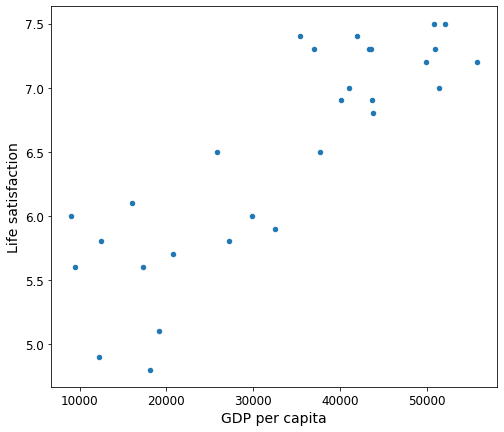

[[5.96242338]]


In [46]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import sklearn.linear_model

#Load the data 
oecd_bli = pd.read_csv(datapath+ "oecd_bli_2015.csv", thousands = ',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv", thousands = ',', delimiter = '\t',
                             encoding="latin1", na_values="n/a")

#prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
x = np.c_[country_stats["GDP per capita"]] 
#c_ ->Translates slice objects to concatenation along the second axis.
y = np.c_[country_stats["Life satisfaction"]]

#visualize the data

country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction',figsize=(8,7))
plt.show()

#select a linear model
model = sklearn.linear_model.LinearRegression()

#train the model
model.fit(x,y)

#Make a prediction for Cyprus
X_new = [[22587]] #cyprus' GDP per capita
print(model.predict(X_new))



<h3>Replacing the Linear Regression model with k-Nearest Neighbors (in this example, k = 3) regression in the previous code is as simple as replacing these two lines:

</h3>

In [49]:
#select  a3-Nearest Neighbors regression model
import sklearn.neighbors
model1= sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

#train the model
model1.fit(x,y)

#make a prediction for Cyprus
print(model1.predict(X_new))

[[5.76666667]]


In [ ]:
df = pd.read_csv("/content/datasets/lifesat/oecd_bli_2015.csv")
df
df2 = pd.read_csv("/content/datasets/lifesat/gdp_per_capita.csv",encoding ="ISO-8859-1",on_bad_lines='skip')
df2